In [1]:
# loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [2]:
from pathlib import Path
data=pd.read_csv(Path('BankDataset.csv'))# use .read_csv() method to get the whole data

In [3]:
data.head()  # print the first 6 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,technician,married,secondary,no,0,yes,yes,unknown,15,may,16.6,2,-1,0,unknown,no
1,38,entrepreneur,single,secondary,no,9250,no,no,cellular,5,feb,6.5,1,-1,0,unknown,no
2,33,technician,married,tertiary,no,750,no,no,cellular,21,aug,2.1,2,-1,0,unknown,no
3,36,blue-collar,divorced,primary,yes,0,yes,no,cellular,11,may,2.1,2,305,1,failure,no
4,47,admin.,married,tertiary,no,4850,yes,no,cellular,8,feb,6.2,3,-1,0,unknown,no


In [4]:
data.describe()  # description of the data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,4.521100e+04,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,6.811360e+04,15.806419,4.811061,2.763841,40.197828,0.580323
std,10.618762,1.522383e+05,8.322476,4.292172,3.098021,100.128746,2.303441
min,18.000000,-4.009500e+05,1.000000,0.500000,1.000000,-1.000000,0.000000
25%,33.000000,3.600000e+03,8.000000,2.200000,1.000000,-1.000000,0.000000
50%,39.000000,2.240000e+04,16.000000,3.500000,2.000000,-1.000000,0.000000
75%,48.000000,7.140000e+04,21.000000,5.800000,3.000000,-1.000000,0.000000
max,95.000000,5.106350e+06,31.000000,82.500000,63.000000,871.000000,275.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


**In this dataset, we can divide the 17 columns into 5 parts:**
- Client Basic Information: age,job,marital,education,
- Client Financial Information: default,balance,housing,loan
- Client Contact Information: contact,day,month,duration
- Campaign Information: campaign, pdays,previous,poutcome
- Target value：y


# Target Value Analysis

In [6]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

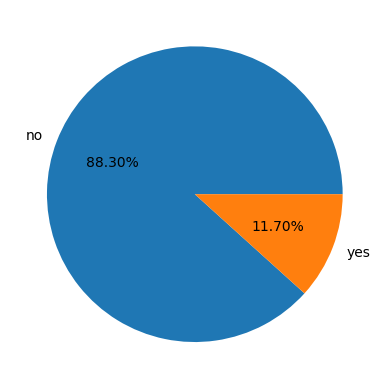

In [7]:
# To visualize the distribution of Categorical Variables, use pie chart to show it
plt.pie(data['y'].value_counts(), labels=data['y'].value_counts().index.tolist(), autopct='%.2f%%')
plt.show()

# Univariate Analysis

## Client Basic Information Analysis

### Age Analysis

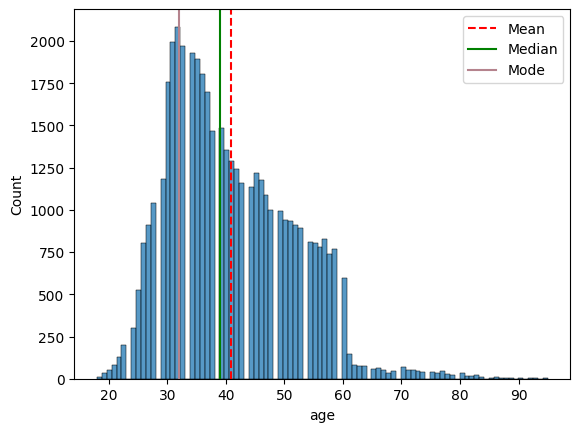

In [8]:
# Visualizing age distribution
mean = data.age.mean()#find the mean value of the "age"
median = data.age.median()#find the median value of the "age"
mode = data.age.mode().values[0] #find the mode (most common value) of the "age"

sns.histplot(data["age"]) 

plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode, color='#b5838d', linestyle='-', label="Mode")
plt.legend()
plt.show()


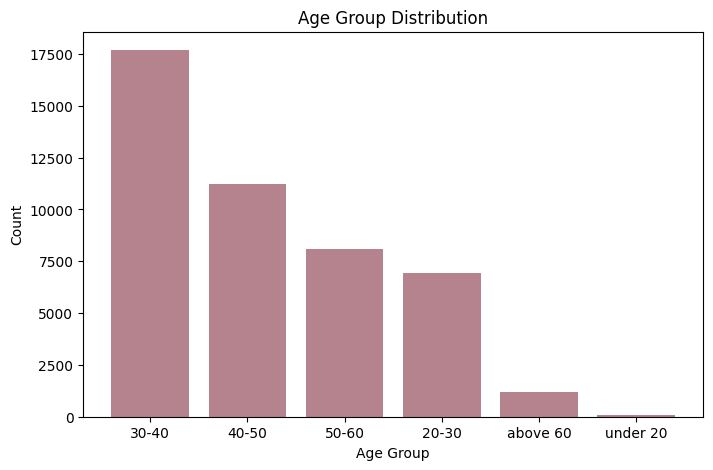

In [9]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, data['age'].max()]
labels = ['under 20', '20-30', '30-40', '40-50', '50-60', 'above 60']

# Categorize age into groups
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

# Count the number of each age group
age_counts = data['age_group'].value_counts()

# Set up plot figure
fig, ax = plt.subplots(figsize=(8, 5))

# Draw bar plot for age group
ax.bar(age_counts.index, age_counts.values, color='#b5838d')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Age Group Distribution')

# Show plot
plt.show()

**Age Analysis:**
It can be seen from the above distribution chart that 
- the peak age of customers appears between 30-40 years old. People at this age are more efficient or willing to participate in bank activities. 
- customers are mainly distributed between 30-60 years old. 
- The smallest group is "under 20"


### Job, Marital, Education Analysis

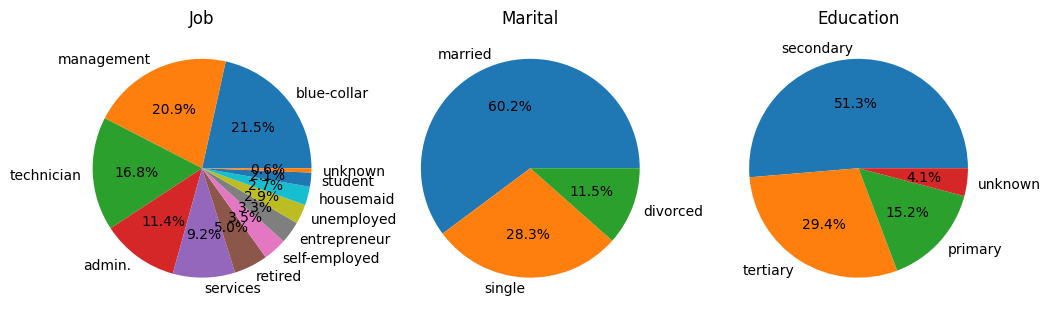

In [10]:
# Get value counts for job, marital, and education
job_counts = data['job'].value_counts()
marital_counts = data['marital'].value_counts()
education_counts = data['education'].value_counts()

# Set up plot figure
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Draw pie chart for job variable
axs[0].pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%')
axs[0].set_title('Job')

# Draw pie chart for marital variable
axs[1].pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%')
axs[1].set_title('Marital')

# Draw pie chart for education variable
axs[2].pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%')
axs[2].set_title('Education')

plt.show()

- `Job`
  - It can be seen from the figure that the main user groups are blue-collar workers, managers, technicians, administrative staff, and service workers, who account for more than 70% of the number. 
  - The smallest three groups are represented by unemployed, students and an uknown group. The marketing team assumed that these groups might not have savings to deposit.
  - This could mean that the department was targeting mainly individuals and not legal entities; also it can mean that deposits offers would be of interest only to individuals and not self-employed or enterpreneurs.
-`marital`
  - It can be seen from the above figure that 60.2% of the clients in this case are married, 28.3% of clients are single, and remaining 11.5% of clients are divorced
- `Education`
  - It can be seen from the figure that users are mainly in secondary education, accounting for more than 50%, followed by people with higher education, nearly 30% is tertiary degree.
  - Users with different levels of education have completely different effects on accepting bank marketing products

## Client Financial Situation Analysis

### Default,Housing,Loan Analysis

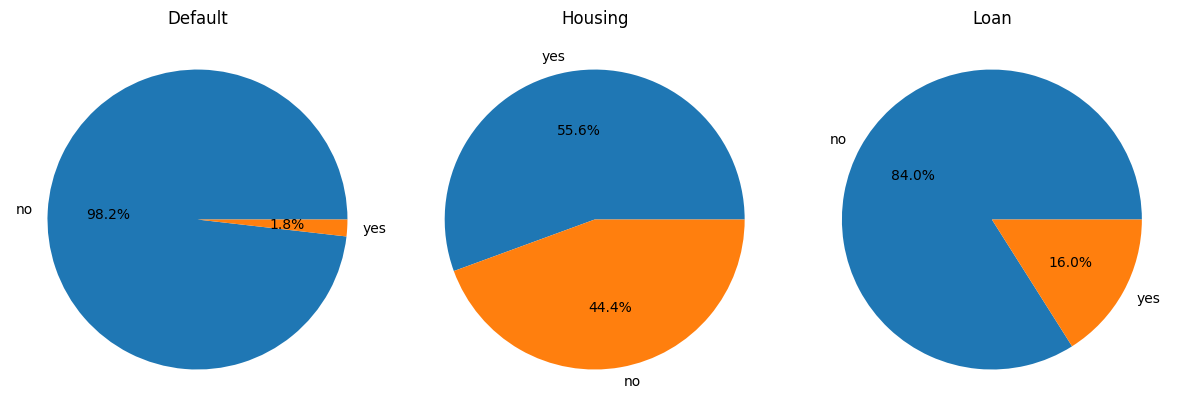

In [11]:
# Get value counts for default, housing, and loan
default_counts = data['default'].value_counts()
housing_counts = data['housing'].value_counts()
loan_counts = data['loan'].value_counts()

# Set up plot figure
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

# Draw pie chart for default variable
axs[0].pie(default_counts.values, labels=default_counts.index, autopct='%1.1f%%')
axs[0].set_title('Default')

# Draw pie chart for housing variable
axs[1].pie(housing_counts.values, labels=housing_counts.index, autopct='%1.1f%%')
axs[1].set_title('Housing')

# Draw pie chart for loan variable
axs[2].pie(loan_counts.values, labels=loan_counts.index, autopct='%1.1f%%')
axs[2].set_title('Loan')

plt.tight_layout()
plt.show()

**Financial Analysis**
- `default`
  - Around 98.2% of the dataset do not have credit in defaults
  - It seems that sales agents avoided people with financial troubles and reached out to people who they did not know whether they had default or not
- `housing`
  - 55.6% of people have housing loans and 44.4% do not. It seems that having a housing loan was not indicative of failure for sales agents as they did not target only people without housing loans. 
- `loan`
  - 84% of people have personal loans and 16% do not. Presence of personal loan seems to be a negative factor for sales agents as they targeted primarily people without personal loan.
 
- **Conclusion**
  - Having a personal loan or default credit makes people less suitable candidates for opening a deposit, however having a housing loan is not a barrier.
 

### Balance Analysis

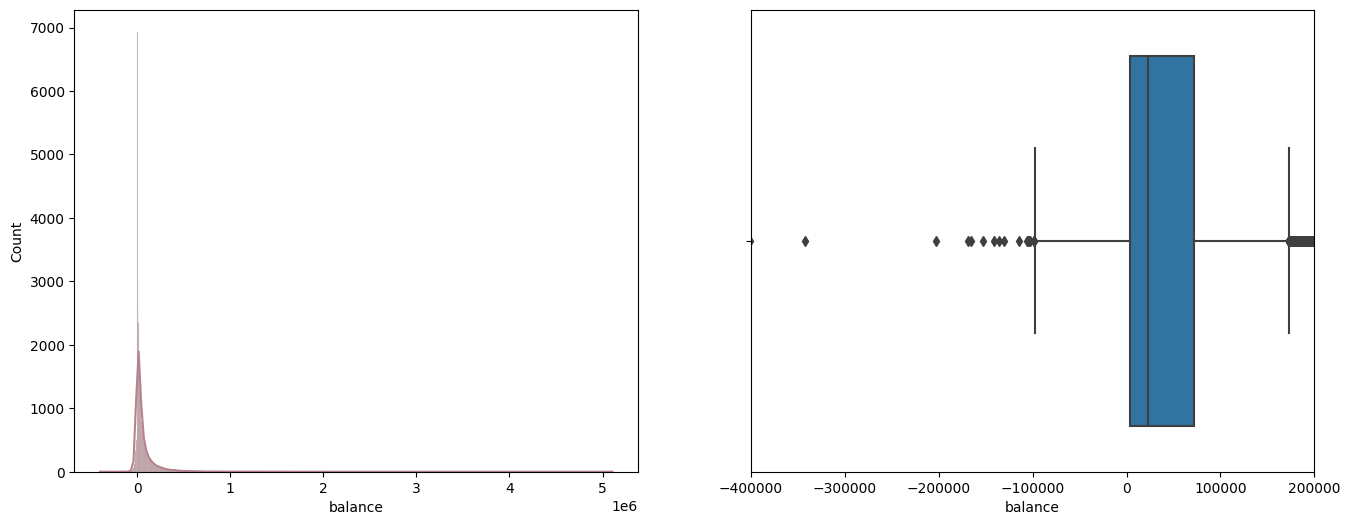

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (16,6))
sns.histplot(data=data, x='balance', kde=True, color='#b5838d', ax=axes[0])
sns.boxplot(x = data.balance, ax = axes[1])
plt.xlim(left=-400000, right=200000)
plt.show()

- `balance` Analysis
  - It can be seen that the most clients' annual balance is around 0-100000 HKD 
  - It can also be seen that the gap between the rich and the poor of clients is still quite large
  - There are also very few people with negative balances, and it is inferred that they should be users with extremely poor reputation.
  - Great wealth is in the hands of a few. There are still a very small number of people with negative balances, and it is inferred that they should be users with extremely poor reputation

## Client Contact Information

### contact, day, month, duration

In [13]:
data["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

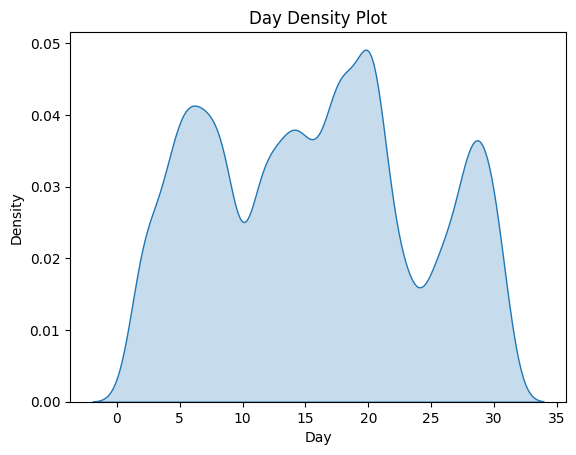

In [14]:
sns.kdeplot(data['day'], shade=True)
plt.title('Day Density Plot')
plt.xlabel('Day')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='month', ylabel='Count'>

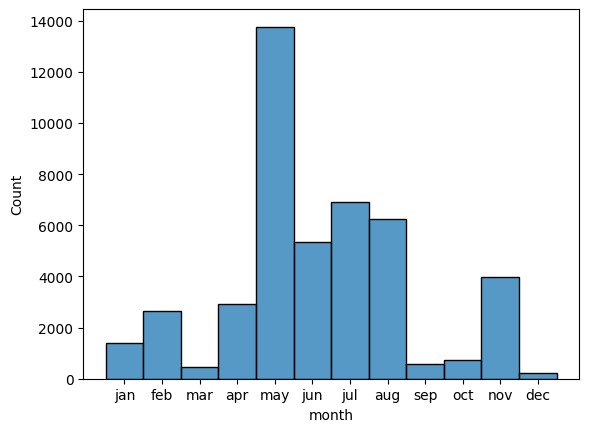

In [15]:
# Visualizing month distribution
data['month'] = pd.Categorical(data['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
sns.histplot(data=data, x='month')

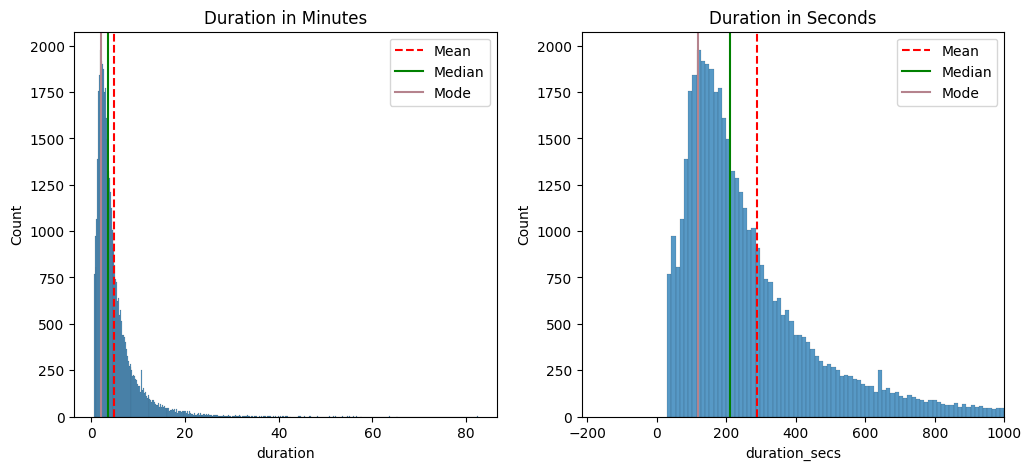

In [16]:
# Visualizing duration distribution in minutes
mean = data.duration.mean() # find the mean value of the "duration"
median = data.duration.median() # find the median value of the "duration"
mode = data.duration.mode().values[0] # find the mode (most common value) of the "duration"

fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # create a figure with two subplots

# plot duration in minutes
sns.histplot(data["duration"], ax=axs[0])
axs[0].axvline(mean, color='r', linestyle='--', label="Mean")
axs[0].axvline(median, color='g', linestyle='-', label="Median")
axs[0].axvline(mode, color='#b5838d', linestyle='-', label="Mode")
axs[0].legend()
axs[0].set_title("Duration in Minutes")

# plot duration in seconds
data['duration_secs'] = data['duration'] * 60 # create a new column with duration in seconds
mean_secs = data.duration_secs.mean() # find the mean value of the "duration_secs"
median_secs = data.duration_secs.median() # find the median value of the "duration_secs"
mode_secs = data.duration_secs.mode().values[0] # find the mode (most common value) of the "duration_secs"

sns.histplot(data["duration_secs"], ax=axs[1])
axs[1].axvline(mean_secs, color='r', linestyle='--', label="Mean")
axs[1].axvline(median_secs, color='g', linestyle='-', label="Median")
axs[1].axvline(mode_secs, color='#b5838d', linestyle='-', label="Mode")
axs[1].legend()
axs[1].set_title("Duration in Seconds")
axs[1].set_xlim(right=1000)

plt.show()


- `contact`: Most people use celluar as contact device, few people use telephone as contact device
- `day`: The highest contact peak day is around 20th of the month
- `month`:The number of calls increase in May spring season，and stays around the same in summer(June, July, August), there is less call in Autumn and Winter seasons
- `duration`: 
  - we draw two figures, left is "duration in minutes", right is "duration in seconds".
  - Most people contact duration is between 100 and 200 seconds.
  - Median is much lower than the mean, it means that there are a lot of calls with duration lower than mean



## Campaign Information

### campaign

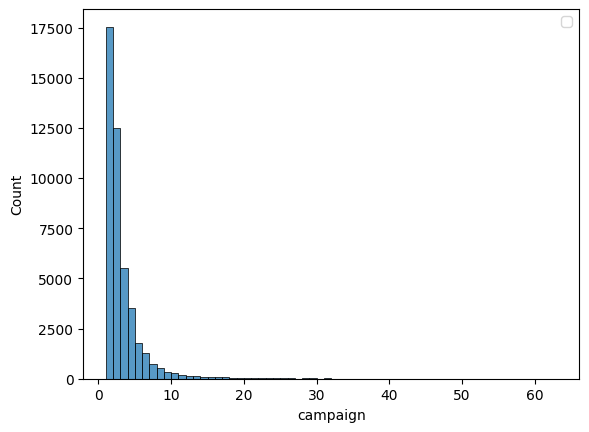

In [17]:
# Visualizing campaign distribution
sns.histplot(data["campaign"],binwidth=1) 
plt.legend()
plt.show()

- `campaign`:of contacts performed during this campaign and for this client
- The vast majority of users call within 10 times in this marketing campaign
- The maximum number of contacts for this marketing is 1

### pdays, previous, poutcome

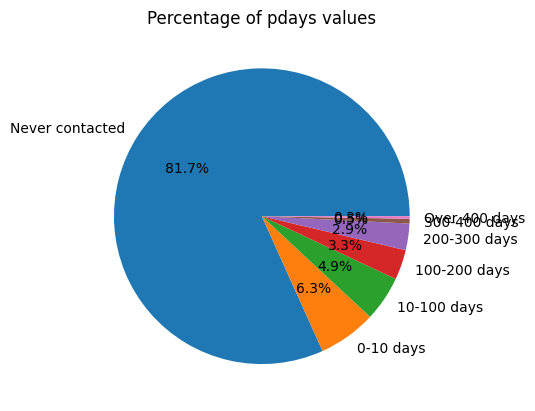

In [18]:
# Create bins for pdays values
bins = [-2, -1, 10, 100, 200, 300, 400, np.inf]
# Create labels for bins
labels = ['Never contacted', '0-10 days', '10-100 days', '100-200 days', '200-300 days', '300-400 days', 'Over 400 days']
# Group pdays values into bins
data['pdays_bin'] = pd.cut(data['pdays'], bins=bins, labels=labels)
# Calculate percentage of pdays values in each bin
pct_pdays = data['pdays_bin'].value_counts(normalize=True) * 100
# Create a pie chart
plt.pie(pct_pdays, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of pdays values')
plt.show()


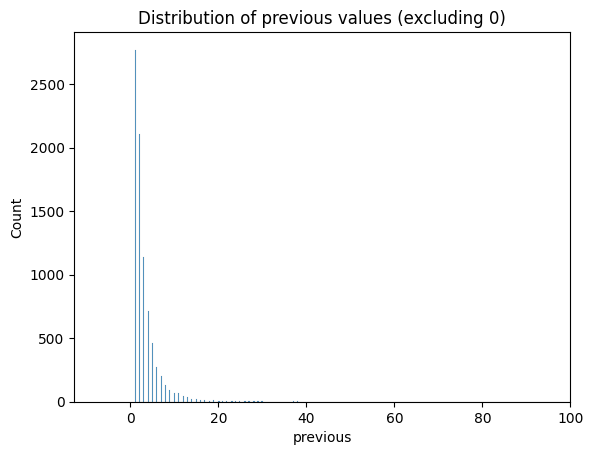

In [19]:
# Filter out rows with previous value of 0
previous_0 = data[data['previous'] != 0]['previous']

# Create histogram
sns.histplot(data=previous_0, stat='count')
plt.title('Distribution of previous values (excluding 0)')
plt.xlim(right=100)
plt.show()

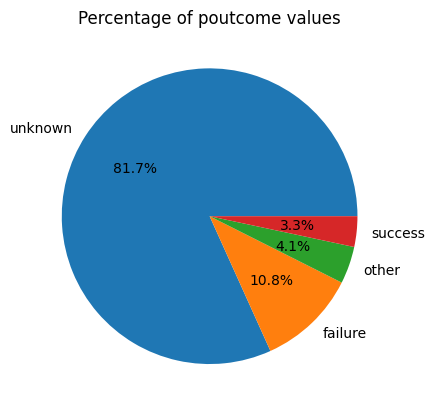

In [20]:
# Calculate percentage of poutcome values
pct_poutcome = data['poutcome'].value_counts(normalize=True) * 100

# Create a pie chart
labels = pct_poutcome.index.tolist()
plt.pie(pct_poutcome, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of poutcome values')
plt.show()

In [21]:
# check the relations among pdays=-1,previous=0,and poutcome='unknown'

#calculate the intersection numbers
df_filtered = data[(data['pdays'] == -1) & (data['previous'] == 0) & (data['poutcome'] == 'unknown')]

# Calculate the percentages for each column
pdays_pct = len(df_filtered)/len(data[data['pdays'] == -1])
previous_pct = len(df_filtered)/len(data[data['previous'] == 0])
poutcome_pct = len(df_filtered)/len(data[data['poutcome'] == 'unknown'])

# Create a table using pandas DataFrame
import pandas as pd
table = pd.DataFrame({
    'pdays=-1': [f'{pdays_pct:.2%}'],
    'previous=0': [f'{previous_pct:.2%}'],
    'poutcome=unknown': [f'{poutcome_pct:.2%}']
})

# Print the table
print(table)

  pdays=-1 previous=0 poutcome=unknown
0  100.00%    100.00%           99.99%


In [22]:
len(df_filtered)

36954

In [23]:
len(data[data['poutcome'] == 'unknown'])

36959

- `pdays`:# of days since the client was last contacted from a previous campaign (numeric, -1 means client was not previously
contacted)
  - 81.7% of the clients are never contacted in previous campaign
- `previous`: # of contacts performed before this campaign and for this client(numeric)
  - The number of contacts with the most before is 1, and the number of users with more contacts is less
- `poutcome`: 81.7% clients are unknown, 10.8% clients are failure
- **relation of `pdays` and `previous`**: if the client is never contacted in previous campaign, the `pdays` value is -1, and the `previous` value is 0. These two values are matched
- However, the poutcome=unknown is 36959, previous=0 and pdays=-1 number is 36954, which means that there are 5 clients contacted before but the result is unknown


# Bivariate Analysis

## Correlation Matrix

<Axes: >

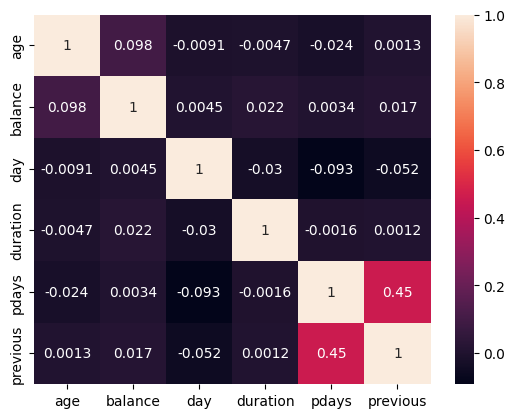

In [24]:
corr = data[["age", "balance", "day", "duration", "pdays","previous"]].corr()
corr
sns.heatmap(corr, annot=True)

- previous and pdays related because of the pdays=-1 is matched with previous=0 

## Pairplot

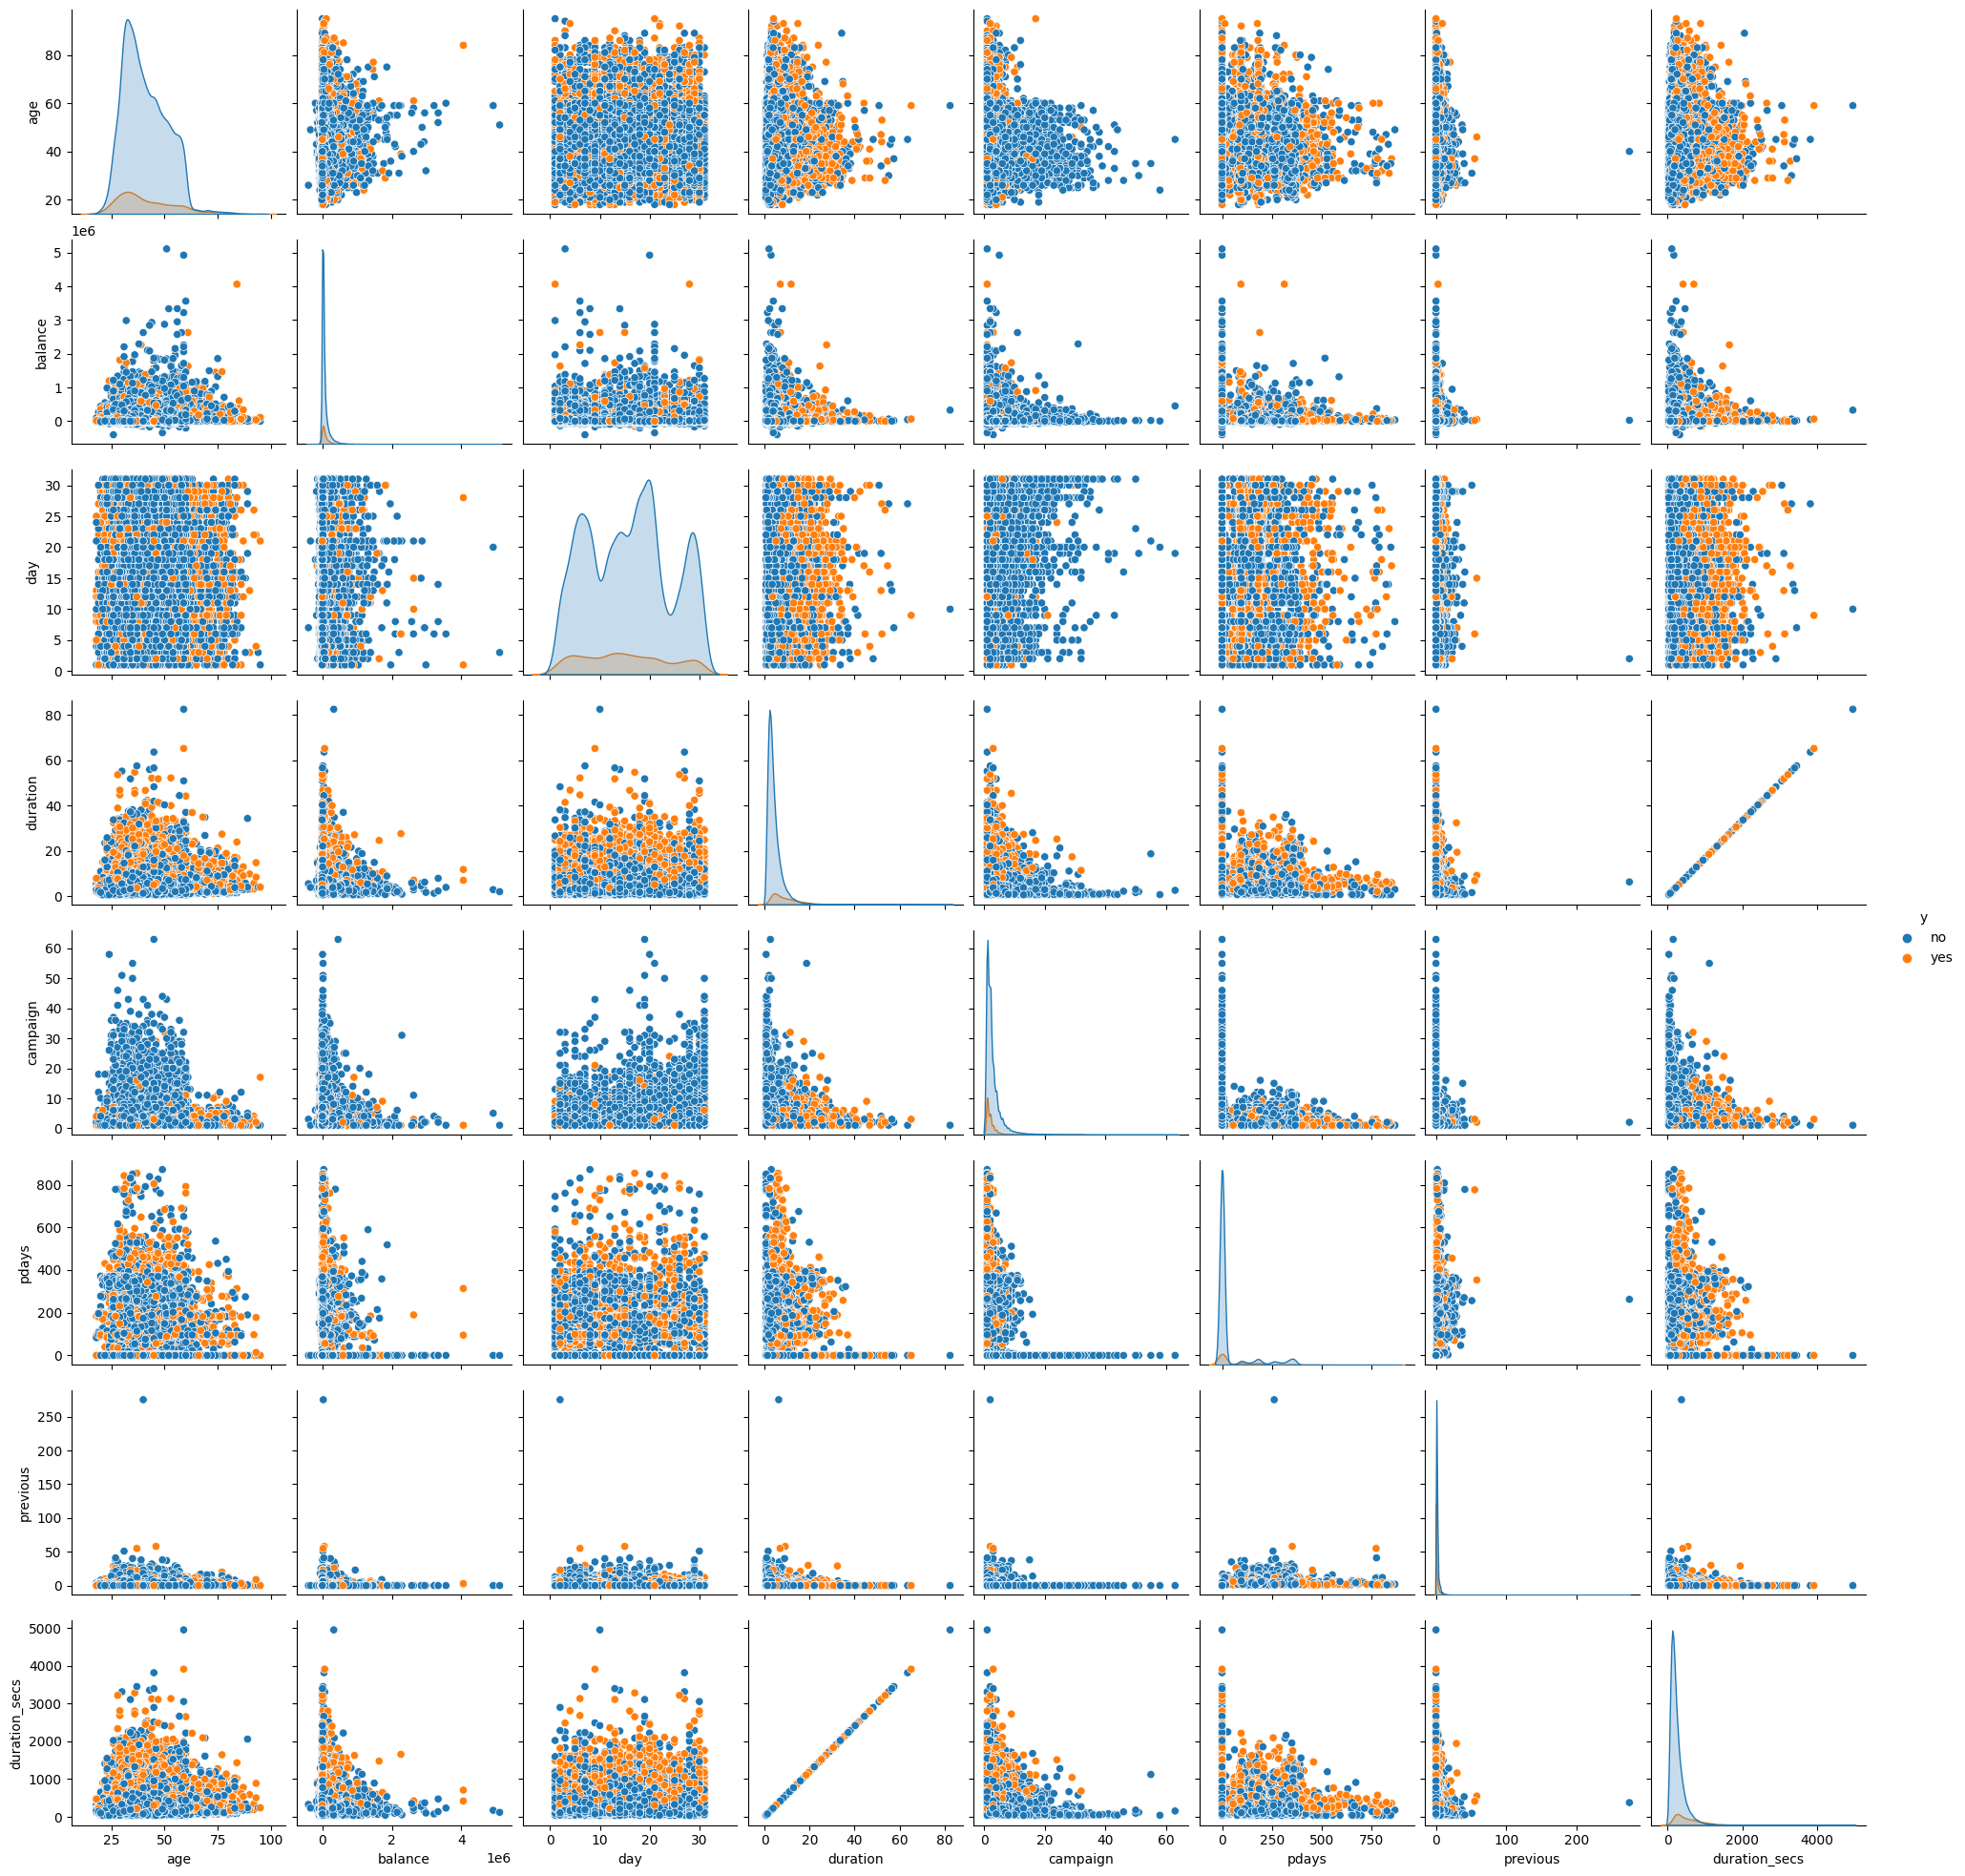

In [25]:
# it may take 5 minutes to run because of the dataset size, so we hide it
#Visualizing pairwise correlations
#sns.pairplot(data, hue="y")

- By analyzing pairwise numerical variables, it was found that there was no significant correlation

## Numerical vs categorical analysis

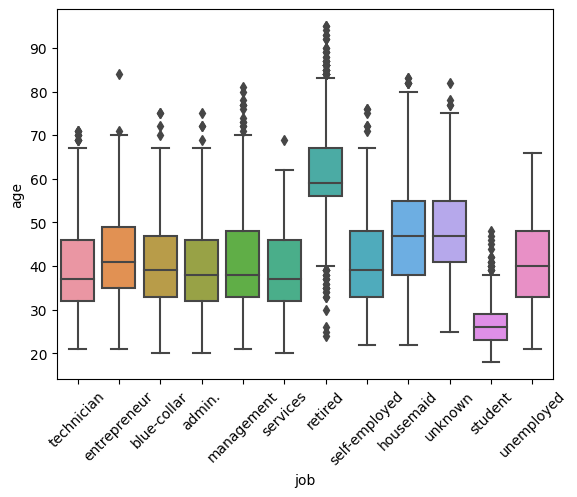

In [26]:
sns.boxplot(data, x="job", y="age")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='education', ylabel='duration'>

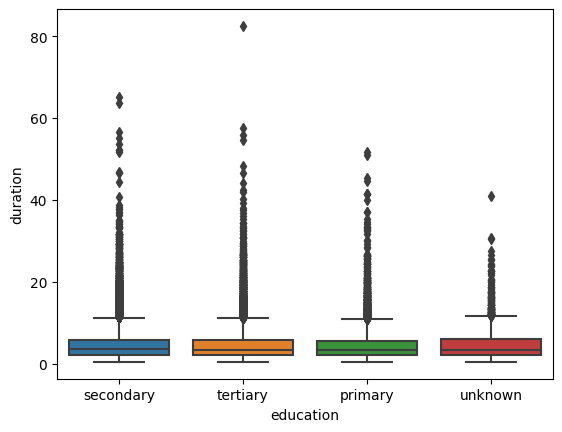

In [27]:
sns.boxplot(data, x="education", y="duration")

<Axes: xlabel='marital', ylabel='percent'>

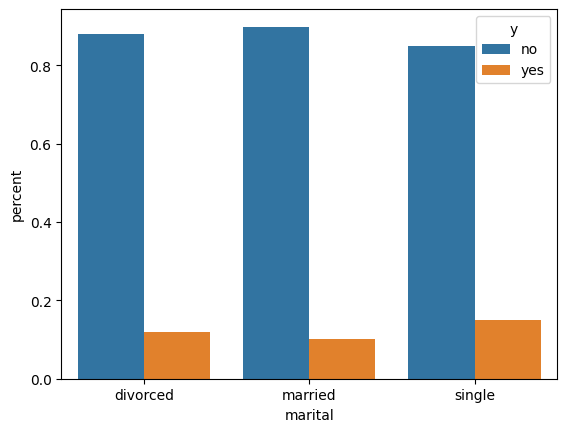

In [28]:
df = data.groupby(["marital", "y"]).count()["age"].reset_index().rename({"age":"count"}, axis=1)
df2 = data.groupby("marital").count()["age"].reset_index().rename({"age":"total"}, axis=1)
df = pd.merge(df, df2)
df["percent"] = df["count"]/df["total"]
sns.barplot(data=df, x="marital", y="percent", hue="y")

## Categorical vs Target outcome Analysis

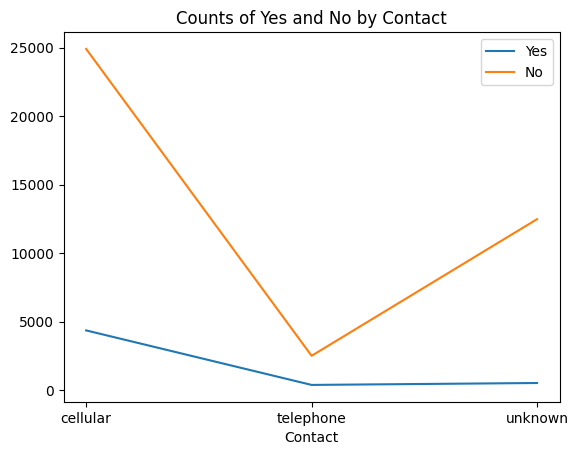

In [29]:
counts = data.groupby(['contact', 'y']).size().reset_index(name='count')
yes_counts = counts[counts['y'] == 'yes']
no_counts = counts[counts['y'] == 'no']
fig, ax = plt.subplots()
ax.plot(yes_counts['contact'], yes_counts['count'], label='Yes')
ax.plot(no_counts['contact'], no_counts['count'], label='No')
ax.set_xlabel('Contact')
ax.set_title('Counts of Yes and No by Contact')

ax.legend()
plt.show()

<Axes: xlabel='default', ylabel='percent'>

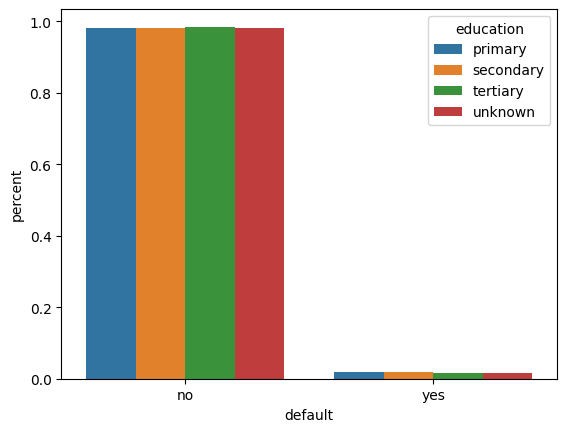

In [30]:
df = data.groupby(["education", "default"]).count()["age"].reset_index().rename({"age":"count"}, axis=1)
df2 = data.groupby("education").count()["age"].reset_index().rename({"age":"total"}, axis=1)
df = pd.merge(df, df2)
df["percent"] = df["count"]/df["total"]
sns.barplot(data=df, x="default", y="percent", hue="education")

<Axes: xlabel='housing', ylabel='percent'>

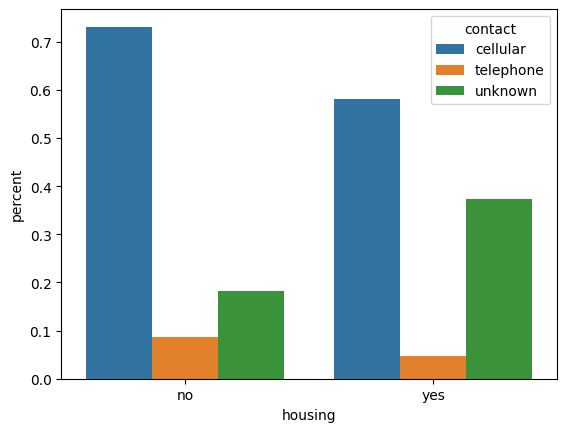

In [31]:
df = data.groupby(["housing", "contact"]).count()["age"].reset_index().rename({"age":"count"}, axis=1)
df2 = data.groupby("housing").count()["age"].reset_index().rename({"age":"total"}, axis=1)
df = pd.merge(df, df2)
df["percent"] = df["count"]/df["total"]
sns.barplot(data=df, x="housing", y="percent", hue="contact")

<Axes: xlabel='poutcome', ylabel='percent'>

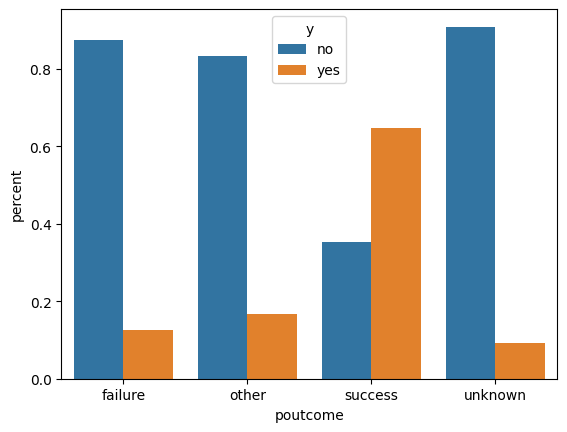

In [32]:
df = data.groupby(["poutcome", "y"]).count()["age"].reset_index().rename({"age":"count"}, axis=1)
df2 = data.groupby("poutcome").count()["age"].reset_index().rename({"age":"total"}, axis=1)
df = pd.merge(df, df2)
df["percent"] = df["count"]/df["total"]
sns.barplot(data=df, x="poutcome", y="percent", hue="y")

<Axes: xlabel='loan', ylabel='percent'>

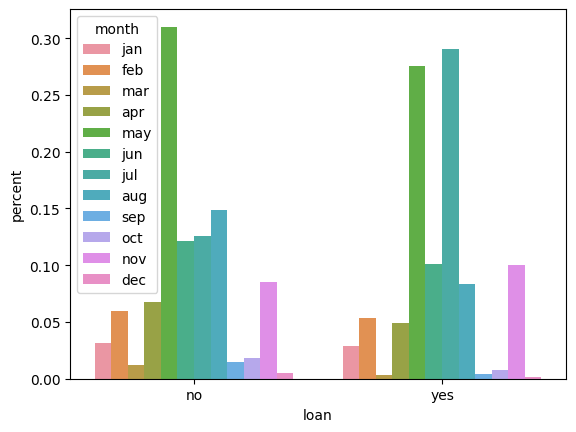

In [33]:
df = data.groupby(["loan", "month"]).count()["age"].reset_index().rename({"age":"count"}, axis=1)
df2 = data.groupby("loan").count()["age"].reset_index().rename({"age":"total"}, axis=1)
df = pd.merge(df, df2)
df["percent"] = df["count"]/df["total"]
sns.barplot(data=df, x="loan", y="percent", hue="month")

# Multivariate Analysis

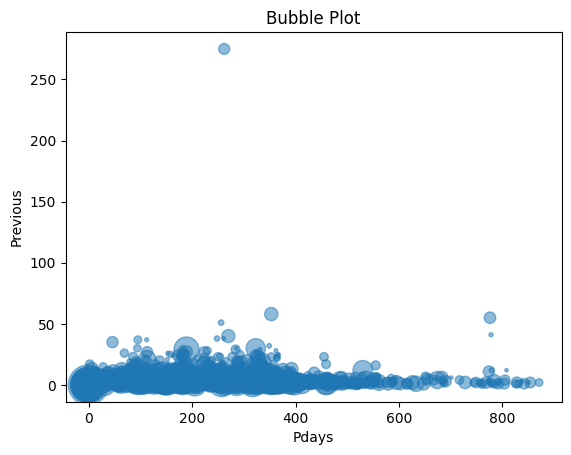

In [34]:
# pdays, previous, duration
plt.scatter(data['pdays'], data['previous'], s=data['duration']*10, alpha=0.5)

plt.title('Bubble Plot')
plt.xlabel('Pdays')
plt.ylabel('Previous')
plt.show()